In [417]:
#dristributed evolutionary algorithms in python
from deap import creator, base, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt

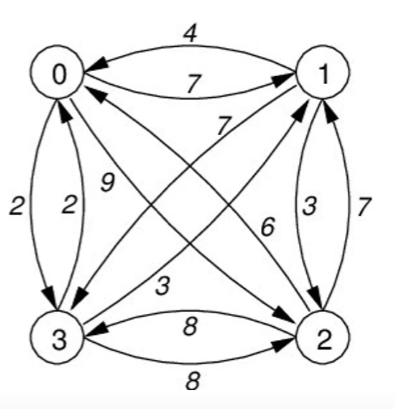

In [418]:
toolbox = base.Toolbox()
 
#genes, ou numero de cidades percorridas
n = 4

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("individuo", list, fitness=creator.FitnessMin)

toolbox.register("Genes", np.random.permutation, n)
toolbox.register("Individuos", tools.initIterate, creator.individuo, toolbox.Genes)


In [419]:
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)

In [420]:
pop = toolbox.Populacao(n=10)

In [421]:
toolbox.register("mate", tools.cxPartialyMatched)
#[0, 1, 2, 3]
#[3, 0, 2, 1]
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=2)


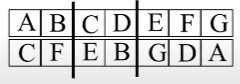

In [422]:
distancias =   [[0, 7, 9 ,2], 
                [4, 0, 3, 7],
                [6, 7, 0, 8],
                [2, 3, 8, 0]]

In [423]:
def aptidao(individual):
    distancia = 0
    for i in range(n-1):
        distancia += distancias[individual[i]][individual[i+1]]
    #distancia += distancias[individual[n-1]][individual[0]]
    return distancia,  

In [424]:
toolbox.register("evaluate", aptidao)

In [425]:
def estatisticaSalvar(individiuo):
    return individiuo.fitness.values

In [426]:
estatistica = tools.Statistics(key=estatisticaSalvar)
estatistica.register("mean", np.mean)
estatistica.register("min", np.min)
estatistica.register("max", np.max)

In [427]:
hof = tools.HallOfFame(1)

In [428]:
result, log = algorithms.eaSimple(pop, 
                                  toolbox, 
                                  cxpb=0.8, 
                                  mutpb=0.1, 
                                  ngen=1000, 
                                  stats=estatistica, 
                                  halloffame=hof, 
                                  verbose=True)

gen	nevals	mean	min	max
0  	10    	17.7	13 	22 
1  	9     	15.7	11 	21 
2  	8     	14  	11 	17 
3  	7     	13.6	11 	20 
4  	6     	11.9	11 	16 
5  	10    	13.1	11 	20 
6  	8     	11.6	11 	15 
7  	8     	11  	11 	11 
8  	8     	11.9	11 	20 
9  	6     	11  	11 	11 
10 	8     	11  	11 	11 
11 	8     	11  	11 	11 
12 	6     	11  	11 	11 
13 	10    	11.7	11 	18 
14 	8     	11  	11 	11 
15 	9     	11.7	11 	18 
16 	10    	11  	11 	11 
17 	10    	11.7	11 	18 
18 	10    	11  	11 	11 
19 	6     	11  	11 	11 
20 	10    	11  	11 	11 
21 	9     	11  	11 	11 
22 	8     	11  	11 	11 
23 	10    	11  	11 	11 
24 	6     	11.7	11 	18 
25 	10    	11.9	11 	20 
26 	10    	11  	11 	11 
27 	7     	11  	11 	11 
28 	8     	11.3	11 	14 
29 	7     	12.7	11 	22 
30 	10    	11.6	11 	17 
31 	6     	11  	11 	11 
32 	9     	11  	11 	11 
33 	6     	11  	11 	11 
34 	9     	11.5	11 	16 
35 	10    	11.9	11 	20 
36 	7     	11  	11 	11 
37 	10    	11  	11 	11 
38 	8     	11.6	11 	17 
39 	8     	11  	11 	11 
40 	8     	11.6	

In [429]:
print(result)

[[1, 3, 0, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [1, 3, 0, 2], [0, 3, 1, 2], [0, 3, 1, 2]]


In [430]:
print(f"Hall da fama: {hof}")
melhor = hof[0]
print(aptidao(melhor))

Hall da fama: [[0, 3, 1, 2]]
(8,)


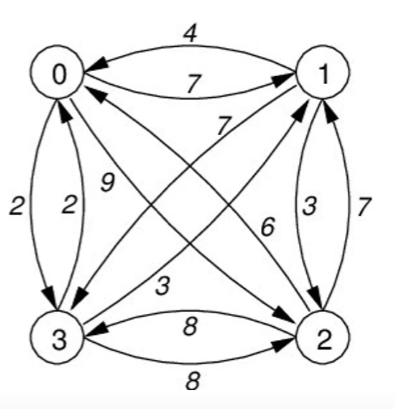

In [431]:
menores = log.select('min')
maiores = log.select('max')
media = log.select('mean')

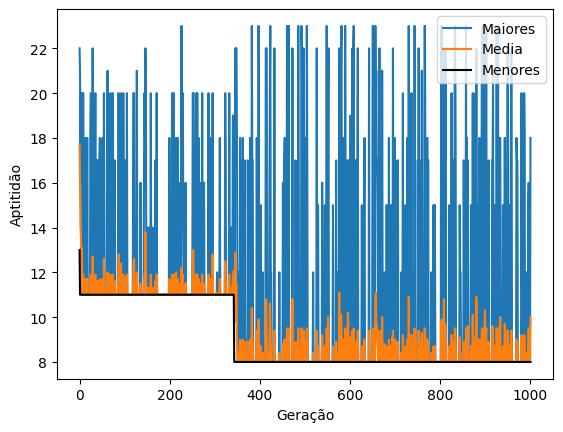

In [432]:
plt.plot(maiores, label="Maiores")
plt.plot(media, label="Media") 
plt.plot(menores, color="black", label="Menores")

plt.xlabel("Geração")
plt.ylabel("Aptitidão")
plt.legend(loc=1)